# **Siklus Primer Desain V1**





In [ ]:
import numpy as np # linear algebra
from numpy import array
import pandas as pd # data processing
import matplotlib.pyplot as plt
import glob
import os
from pathlib import Path
from scipy.interpolate import griddata

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
path = r'/content/gdrive/My Drive/stream data from chemcad design 1' # use your path
files = Path(path).glob('*.csv')  # .rglob to get subdirectories
count_f = glob.glob(path + "/*.csv")
print(len(count_f))
dfs = list()
for f in files:
  for i in range (len(count_f)):
    data = pd.read_csv(f)
    #print(data)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
df7 = pd.concat(dfs, ignore_index=True)
#print(df7)

Mounted at /content/gdrive
10


In [ ]:
sheet = (len(df7.index))/(len(count_f))
print(sheet)

630.0


In [ ]:
#Laju Massa Aliran Primer
a = 9
data_massfd = list()
while a < len(df7.index):
    mass_flow = df7.loc[a]
    #print(mass_flow)
    data_massfd.append(mass_flow[1])
    data_massfd = [*set(data_massfd)]
    a = sheet + a
data_massfd = [eval(i) for i in data_massfd]
data_massfd.sort(reverse=False)
print(data_massfd)
print(len(data_massfd))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
10


In [ ]:
#Aliran 5, Temperatur keluar steam generator siklus sekunder
s = 10
data_t5 = list()
while s<len(df7.index):
  temp_reac = df7.loc[s]
  data_t5.append(temp_reac[5])
  #data_t5 = [*set(data_t5)]
  s = sheet + s
data_t5 = [eval(i) for i in data_t5]
data_t5.sort(reverse=False)
print(data_t5)
print(len(data_t5))

[339.2555, 339.2555, 339.2555, 339.2555, 350.3957, 398.864, 460.5069, 517.6917, 561.5035, 592.965]
10


In [ ]:
#Aliran 2, Temperatur keluar steam generator siklus primer
s = 10
data_t2 = list()
while s<len(df7.index):
  temp_reac = df7.loc[s]
  data_t2.append(temp_reac[2])
  #data_t2 = [*set(data_t2)]
  s = sheet + s
data_t2 = [eval(i) for i in data_t2]
data_t2.sort(reverse=False)
print(data_t2)
print(len(data_t2))

[67.8297, 68.2816, 70.7787, 70.803, 72.2701, 75.7963, 87.1647, 106.4344, 131.2983, 158.5026]
10


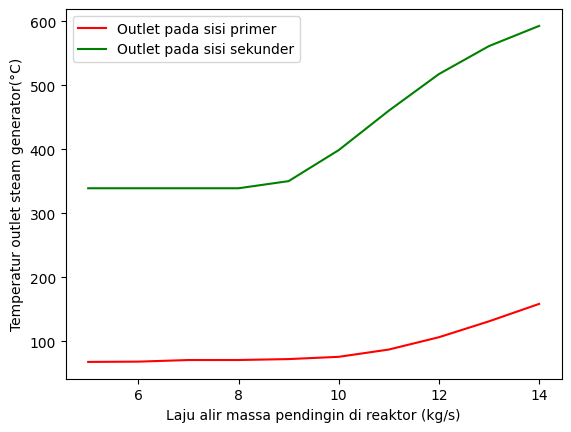

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd)
  
# Assign variables to the y axis part of the curve
y = np.array(data_t5)
y1 = np.array(data_t2)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r', label='Outlet pada sisi primer')
ax.plot(X, y, 'g', label='Outlet pada sisi sekunder')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Temperatur outlet steam generator(°C)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# **DAYAAAA**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
path = r'/content/gdrive/My Drive/power data from chemcad design 1' # use your path
files = Path(path).glob('*.csv')  # .rglob to get subdirectories
count_f = glob.glob(path + "/*.csv")
print(len(count_f))
dfs = list()
for f in files:
  for i in range (len(count_f)):
    data = pd.read_csv(f)
    #print(data)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
dfpower = pd.concat(dfs, ignore_index=True)
#print(df7)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
10


In [ ]:
sheet2 = (len(dfpower.index))/(len(count_f))
print(sheet2)

1070.0


In [ ]:
#sheet
#print(dfpower)
#print(dfpower.loc[0])
#print(dfpower.loc[1069])

#Reaktor
#print(dfpower.loc[10])

#Pompa
print(dfpower.loc[24])

#Heat Exchanger
#print(dfpower.loc[51])

#Separator
#print(dfpower.loc[69])

#Turbin
#print(dfpower.loc[84])

#Blower
#print(dfpower.loc[100])

CHEMCAD                          Calculated power
6.1.4                                      0.1302
Page                                       0.0024
1                                             NaN
Unnamed: 4                                    NaN
Unnamed: 5                                    NaN
file          Siklus Tak Langsung Desain TA1 V1_5
Name: 24, dtype: object


## **Daya Reaktor**

In [ ]:
#DAYA PELUIT-40, HEAT DUTY MJ/S
p = 10
daya_reaktor = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_reaktor.append(daya[1])
  daya_reaktor = [*set(daya_reaktor)]
  p = sheet2 + p

daya_reaktor = [eval(i) for i in daya_reaktor]
daya_reaktor.sort(reverse=False)
print(daya_reaktor)
print(len(daya_reaktor))

[40]
1


## **Daya Sirkulator**

In [ ]:
#DAYA POMPA A (To St. Generator), CALCULATED POWER MJ/S
p = 24
daya_pompaa = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_pompaa.append(daya[1])
  #daya_pompaa = [*set(daya_pompaa)]
  p = sheet2 + p

daya_pompaa = [eval(i) for i in daya_pompaa]
#daya_pompaa.sort(reverse=False)
print(daya_pompaa)
print(len(daya_pompaa))

[0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302]
10


In [ ]:
#DAYA POMPA B (To Separator), CALCULATED POWER MJ/S
p = 24
daya_pompab = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_pompab.append(daya[2])
  #daya_pompab = [*set(daya_pompab)]
  p = sheet2 + p

daya_pompab = [eval(i) for i in daya_pompab]
#daya_pompab.sort(reverse=False)
print(daya_pompab)
print(len(daya_pompab))

[0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024]
10


## **Daya IHX**

In [ ]:
#Daya Steam Generator
p = 41
daya_steamgenerator = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_steamgenerator.append(daya[1])
  #daya_steamgenerator = [*set(daya_steamgenerator)]
  p = sheet2 + p

daya_steamgenerator = [eval(i) for i in daya_steamgenerator]
#daya_steamgenerator.sort(reverse=False)
print(daya_steamgenerator)
print(len(daya_steamgenerator))

[16.3471, 19.7093, 22.9777, 26.0943, 29.4259, 32.4346, 35.0277, 37.0098, 38.4134, 39.3884]
10


## **Daya Sistem**

In [ ]:
#Daya Heat Exchanger, proses desalinasi
p = 41
daya_heatexchanger = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_heatexchanger.append(daya[2])
  #daya_heatexchanger = [*set(daya_heatexchanger)]
  p = sheet2 + p

daya_heatexchanger = [eval(i) for i in daya_heatexchanger]
daya_heatexchanger.sort(reverse=False)
print(daya_heatexchanger)
print(len(daya_heatexchanger))

[8.8906, 9.707, 12.147, 15.1454, 18.1971, 20.6221, 21.8818, 22.8157, 23.3693, 23.7048]
10


In [ ]:
#Daya Separator
p = 68
daya_separator = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_separator.append(daya[1])
  #daya_separator = [*set(daya_separator)]
  p = sheet2 + p

daya_separator = [eval(i) for i in daya_separator]
#daya_separator.sort(reverse=False)
print(daya_separator)
print(len(daya_separator))

[2.1242, 2.0896, 2.0776, 1.9593, 1.7065, 1.3204, 0.9871, 0.616, 0.2955, 0.0294]
10


## **Daya Sistem Kogenerasi**

In [ ]:
#Daya Sistem Kogenerasi
p = 41
daya_kogenerasi = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_kogenerasi.append(daya[3])
  #daya_kogenerasi = [*set(daya_kogenerasi)]
  p = sheet2 + p

daya_kogenerasi = [eval(i) for i in daya_kogenerasi]
#daya_kogenerasi.sort(reverse=False)
print(daya_kogenerasi)
print(len(daya_kogenerasi))

[3.6451, 3.6459, 3.6459, 3.6459, 3.6729, 3.7916, 3.9455, 4.0703, 4.2038, 4.2645]
10


## **Daya Turbin**

In [ ]:
#Daya Turbin A
p = 83
daya_turbina = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_turbina.append(daya[1])
  #daya_turbina = [*set(daya_turbina)]
  p = sheet2 + p

daya_turbina = [eval(i) for i in daya_turbina]
daya_turbina = [ -x for x in daya_turbina]
#daya_turbina.sort(reverse=False)
print(daya_turbina)
print(len(daya_turbina))

[1.9666, 6.1098, 6.1098, 6.1098, 6.1098, 6.1887, 7.035, 7.5872, 7.9833, 8.2959]
10


In [ ]:
#Daya Turbin B
p = 83
daya_turbinb = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_turbinb.append(daya[2])
  #daya_turbinb = [*set(daya_turbinb)]
  p = sheet2 + p

daya_turbinb = [eval(i) for i in daya_turbinb]
daya_turbinb = [ -x for x in daya_turbinb]
#daya_turbinb.sort(reverse=False)
print(daya_turbinb)
print(len(daya_turbinb))

[3.2851, 3.2851, 3.2851, 3.2851, 3.2851, 3.2851, 3.2851, 3.2851, 3.2851, 3.2851]
10


In [ ]:
daya_turbinx = np.add(daya_turbina, daya_turbinb)
daya_listrik = []
for i in range (len(daya_turbinx)):
  listrik = daya_turbinx[i]-daya_blower[i]-daya_separator[i]-daya_pompaa[i]-daya_pompab[i]
  daya_listrik.append(listrik)
print(daya_listrik)

[2.9806999999999997, 7.1558, 7.164999999999999, 7.2802, 7.530199999999999, 7.992000000000001, 9.1676, 10.0861, 10.796999999999999, 11.3692]


## **Daya Blower**

In [ ]:
#Daya Blower
p = 99
daya_blower = list()
while p<len(dfpower.index):
  daya = dfpower.loc[p]
  daya_blower.append(daya[1])
  #daya_blower = [*set(daya_blower)]
  p = sheet2 + p

daya_blower = [eval(i) for i in daya_blower]
#daya_blower = [ -x for x in daya_blower]
#daya_blower.sort(reverse=False)
print(daya_blower)
print(len(daya_blower))

[0.0142, 0.0169, 0.0197, 0.0228, 0.0256, 0.0288, 0.0328, 0.0376, 0.0433, 0.0498]
10


## **Grafik Daya**

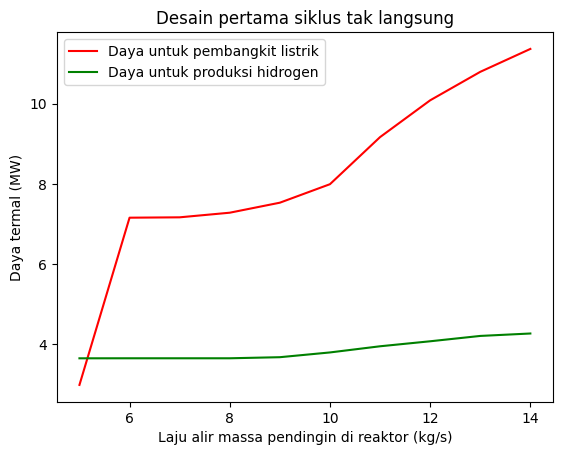

In [ ]:
#jumlah daya listrik
#daya_listrik = [*set(daya_listrik)]

#daya kogenerasi
#daya_kogenerasii = [*set(daya_kogenerasi)]
#daya_kogenerasii.sort(reverse=False)

#daya desalinasi
daya_heatexchanger = [*set(daya_heatexchanger)]

# Using Numpy to create an array X
X = np.array(data_massfd)
  
# Siklus Primer Desain Pertama
y1 = np.array(daya_listrik)
y2 = np.array(daya_kogenerasi)
y3 = np.array(daya_heatexchanger)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r', label='Daya untuk pembangkit listrik')
ax.plot(X, y2, 'g', label='Daya untuk produksi hidrogen')
#ax.plot(X, y3, 'b', label='Daya untuk desalinasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Daya termal (MW)")
plt.title("Desain pertama siklus tak langsung")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

## **EUF**

In [ ]:
#EUF Pembangkit Listrik
data_eufturbin = []
for i in range (len(daya_listrik)):
  EUF = (daya_listrik[i]/40)*100
  data_eufturbin.append(EUF)
  #data_euf = [*set(data_euf)]

data_eufturbin.sort(reverse=False)
print(data_eufturbin)
print(len(data_eufturbin))

[7.451749999999999, 17.889499999999998, 17.912499999999998, 18.2005, 18.825499999999998, 19.980000000000004, 22.919, 25.21525, 26.992499999999996, 28.423]
10


In [ ]:
#EUF Kogenerasi
data_eufkogenerasi = []
for i in range (len(daya_kogenerasi)):
  EUF = (daya_kogenerasi[i]/40)*100
  data_eufkogenerasi.append(EUF)
  #data_euf = [*set(data_euf)]

data_eufkogenerasi.sort(reverse=False)
print(data_eufkogenerasi)
print(len(data_eufkogenerasi))

[9.11275, 9.11475, 9.11475, 9.11475, 9.18225, 9.479, 9.86375, 10.175749999999999, 10.509500000000001, 10.661249999999999]
10


In [ ]:
#EUF Desalinasi
data_eufdesalinasi = []
for i in range (len(daya_heatexchanger)):
  EUF = (daya_heatexchanger[i]/40)*100
  data_eufdesalinasi.append(EUF)
  #data_euf = [*set(data_euf)]

data_eufdesalinasi.sort(reverse=False)
print(data_eufdesalinasi)
print(len(data_eufdesalinasi))

[22.226499999999998, 24.267500000000002, 30.367500000000003, 37.8635, 45.49275, 51.555249999999994, 54.7045, 57.039249999999996, 58.423249999999996, 59.26199999999999]
10


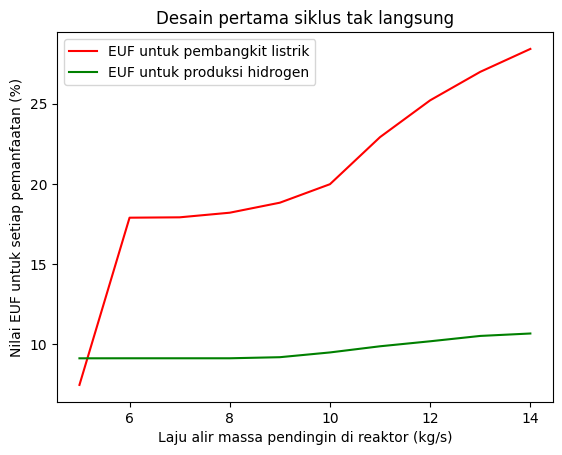

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd)

# Siklus Primer Desain Pertama
y1 = np.array(data_eufturbin)
y2 = np.array(data_eufkogenerasi)
#y3 = np.array(data_eufdesalinasi)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r', label='EUF untuk pembangkit listrik')
ax.plot(X, y2, 'g', label='EUF untuk produksi hidrogen')
#ax.plot(X, y3, 'b', label='EUF untuk desalinasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Nilai EUF untuk setiap pemanfaatan (%)")
plt.title("Desain pertama siklus tak langsung")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
#EUF Total
data_euf = []
for i in range (len(daya_kogenerasi)):
  EUF = daya_kogenerasi[i]+daya_listrik[i]
  EUF = (EUF/40)*100
  data_euf.append(EUF)
  #data_euf = [*set(data_euf)]

data_euf.sort(reverse=False)
print(data_euf)
print(len(data_euf))

[16.5645, 27.004250000000003, 27.027250000000002, 27.315250000000002, 28.007749999999998, 29.459000000000003, 32.78275, 35.391, 37.501999999999995, 39.08425]
10


## **Grafik EUF**

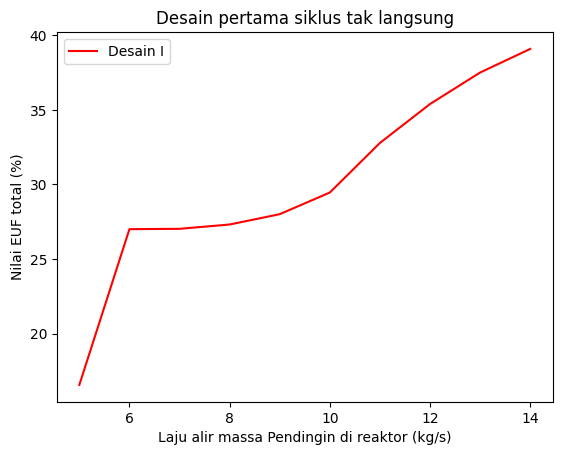

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd)
  
# Siklus Primer
y1 = np.array(data_euf)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r', label='Desain I')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa Pendingin di reaktor (kg/s)")
plt.ylabel("Nilai EUF total (%)")
plt.title("Desain pertama siklus tak langsung")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

## **Efisiensi**

In [ ]:
#daya turbin
daya_turbin = np.add(daya_turbina, daya_turbinb)

#daya blower
#daya_blower = [44,55,66,77,88]

#daya seperator, daya heat exchanger setelah turbin B
#daya_separator = [10, 20, 30, 40, 50]
#daya_heatexchanger = [50, 10, 20, 10, 40]
#daya_steamgenerator = [ 40, 55, 77, 88, 99]
daya_sistem = np.add(daya_separator, daya_steamgenerator)

#daya sirkulator pada siklus sekunder, pompa
#daya_pompaa = [50, 60, 70, 80, 90] #pompa masuk steam generator
#daya_pompab = [30, 40, 50, 60, 70] #pompa masuk HE
daya_sirkulators = np.add(daya_pompaa, daya_pompab)

#daya reaktor, daya_reaktor

#daya kogenerasi, daya_kogenerasi

data_efisiensi = []

for i in range (len(daya_turbin)):
  #efisiensi1 = (daya_heatexchanger[i]+daya_blower[i]+daya_sistem[i]+daya_sirkulators[i]-daya_turbin[i])
  #print(efisiensi1)
  efisiensi = ((daya_listrik[i]+daya_steamgenerator[i]-daya_heatexchanger[i])/(40-daya_kogenerasi[i]))*100
  #efisiensi = (daya_listrik[i]/(40-daya_kogenerasi[i]-daya_heatexchanger[i]))*100
  data_efisiensi.append(efisiensi)
  #print(data_efisiensi)
  data_efisiensi = [*set(data_efisiensi)]
  
data_efisiensi.sort(reverse=False)
print(data_efisiensi)
print(len(data_efisiensi))

[28.70919738467167, 47.19715245323085, 49.50115667833889, 50.14317504765623, 51.63913442030881, 54.69587167618566, 61.88825250662193, 67.57696279122844, 72.18950614869736, 75.70287249373871]
10


## **Grafik Efisiensi**

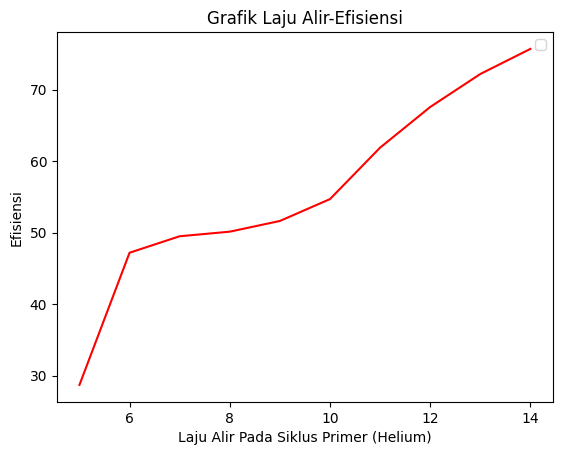

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd)
  
# Data efisiensi
y1 = np.array(data_efisiensi)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju Alir Pada Siklus Primer (Helium)")
plt.ylabel("Efisiensi")
plt.title("Grafik Laju Alir-Efisiensi")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# **Siklus Primer Desain V2**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
path = r'/content/gdrive/My Drive/stream data from chemcad design 2' # use your path
files = Path(path).glob('*.csv')  # .rglob to get subdirectories
count_f = glob.glob(path + "/*.csv")
print(len(count_f))
dfs = list()
for f in files:
  for i in range (len(count_f)):
    data = pd.read_csv(f)
    #print(data)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
df1 = pd.concat(dfs, ignore_index=True)
#print(df7)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
10


In [ ]:
sheet3 = len(df1.index)/len(count_f)
print(sheet3)

630.0


In [ ]:
#Laju Massa Aliran Primer
a = 9
data_massfd2 = list()
while a < len(df1.index):
    mass_flow = df1.loc[a]
    #print(mass_flow)
    data_massfd2.append(mass_flow[1])
    data_massfd2 = [*set(data_massfd2)]
    a = sheet3 + a
data_massfd2 = [eval(i) for i in data_massfd2]
data_massfd2.sort(reverse=False)
print(data_massfd2)
print(len(data_massfd2))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
10


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
path = r'/content/gdrive/My Drive/power data from chemcad design 2' # use your path
files = Path(path).glob('*.csv')  # .rglob to get subdirectories
count_f = glob.glob(path + "/*.csv")
print(len(count_f))
dfs = list()
for f in files:
  for i in range (len(count_f)):
    data = pd.read_csv(f)
    #print(data)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
dfpower2 = pd.concat(dfs, ignore_index=True)
#print(df7)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
10


In [ ]:
sheet4 = len(dfpower2.index)/len(count_f)
print(sheet4)

1070.0


In [ ]:
#sheet
print(dfpower2)
#print(dfpower.loc[0])
#print(dfpower.loc[963])

#Reaktor
#print(dfpower2.loc[10])

#Pompa
#print(dfpower2.loc[33])

#Heat Exchanger
#print(dfpower2.loc[50])

#Separator
#print(dfpower2.loc[68])

#Turbin
#print(dfpower2.loc[83])

#Blower
#print(dfpower2.loc[99])

                   CHEMCAD                              6.1.4   Page  \
0                      NaN                                NaN    NaN   
1                Job name:  Siklus Tak Langsung Desain TA1 V2  Date:   
2                      NaN                                NaN    NaN   
3      EQUIPMENT SUMMARIES                                NaN    NaN   
4                      NaN                                NaN    NaN   
...                    ...                                ...    ...   
10695             (MJ/sec)                                NaN    NaN   
10696          Ideal Cp/Cv                             1.6661    NaN   
10697       Calc Pout  bar                                 30    NaN   
10698  Calc. mass flowrate                                 13    NaN   
10699             (kg/sec)                                NaN    NaN   

              1 Unnamed: 4 Unnamed: 5                                  file  
0           NaN        NaN        NaN   Siklus Tak Langsu

In [ ]:
#DAYA POMPA A (To St. Generator), CALCULATED POWER MJ/S
p = 33
daya_pompaa2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_pompaa2.append(daya[1])
  #daya_pompaa = [*set(daya_pompaa)]
  p = sheet4 + p

daya_pompaa2 = [eval(i) for i in daya_pompaa2]
#daya_pompaa.sort(reverse=False)
print(daya_pompaa2)
print(len(daya_pompaa2))

[0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302]
10


In [ ]:
#DAYA POMPA B (To Separator), CALCULATED POWER MJ/S
p = 33
daya_pompab2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_pompab2.append(daya[2])
  #daya_pompab = [*set(daya_pompab)]
  p = sheet4 + p

daya_pompab2 = [eval(i) for i in daya_pompab2]
#daya_pompab.sort(reverse=False)
print(daya_pompab2)
print(len(daya_pompab2))

[0.0021, 0.0021, 0.0022, 0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.0022, 0.0022]
10


In [ ]:
#Daya Steam Generator
p = 50
daya_steamgenerator2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_steamgenerator2.append(daya[1])
  #daya_steamgenerator = [*set(daya_steamgenerator)]
  p = sheet4 + p

daya_steamgenerator2 = [eval(i) for i in daya_steamgenerator2]
#daya_steamgenerator.sort(reverse=False)
print(daya_steamgenerator2)
print(len(daya_steamgenerator2))

[19.7093, 26.0943, 32.4346, 37.0098, 39.3884, 16.3471, 22.9777, 29.4258, 35.0278, 38.4133]
10


In [ ]:
#Daya Heat Exchanger, proses desalinasi
p = 50
daya_heatexchanger2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_heatexchanger2.append(daya[2])
  #daya_heatexchanger = [*set(daya_heatexchanger)]
  p = sheet4 + p

daya_heatexchanger2 = [eval(i) for i in daya_heatexchanger2]
daya_heatexchanger2.sort(reverse=False)
print(daya_heatexchanger2)
print(len(daya_heatexchanger2))

[8.254, 11.2787, 14.1381, 16.7926, 19.2037, 20.7934, 22.0633, 22.8612, 23.3354, 23.6186]
10


In [ ]:
#Daya Sistem Kogenerasi
p = 50
daya_kogenerasi2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_kogenerasi2.append(daya[3])
  #daya_kogenerasi = [*set(daya_kogenerasi)]
  p = sheet4 + p

daya_kogenerasi2 = [eval(i) for i in daya_kogenerasi2]
daya_kogenerasi2.sort(reverse=False)
print(daya_kogenerasi2)
print(len(daya_kogenerasi2))

[1.8296, 2.1749, 2.5014, 2.8125, 3.1435, 3.4265, 3.656, 3.8299, 3.9541, 4.041]
10


In [ ]:
#Daya Separator
p = 68
daya_separator2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_separator2.append(daya[1])
  #daya_separator = [*set(daya_separator)]
  p = sheet4 + p

daya_separator2 = [eval(i) for i in daya_separator2]
#daya_separator.sort(reverse=False)
print(daya_separator2)
print(len(daya_separator2))

[2.0674, 1.8339, 1.3033, 0.6268, 0.16, 2.0596, 1.9849, 1.5855, 0.9514, 0.3629]
10


In [ ]:
#Daya Turbin A
p = 83
daya_turbina2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_turbina2.append(daya[1])
  #daya_turbina2 = [*set(daya_turbina2)]
  p = sheet4 + p

daya_turbina2 = [eval(i) for i in daya_turbina2]
daya_turbina2 = [ -x for x in daya_turbina2]
daya_turbina2.sort(reverse=False)
print(daya_turbina2)
print(len(daya_turbina2))

[5.4988, 5.4988, 5.4988, 5.4988, 5.8398, 6.6936, 7.4356, 8.1212, 8.6624, 9.0573]
10


In [ ]:
#Daya Turbin B
p = 83
daya_turbinb2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_turbinb2.append(daya[2])
  #daya_turbinb = [*set(daya_turbinb)]
  p = sheet4 + p

daya_turbinb2 = [eval(i) for i in daya_turbinb2]
daya_turbinb2 = [ -x for x in daya_turbinb2]
daya_turbinb2.sort(reverse=False)
print(daya_turbinb2)
print(len(daya_turbinb2))

[2.9566, 2.9566, 2.9566, 2.9566, 2.9566, 2.9566, 2.9566, 2.9566, 2.9566, 2.9637]
10


In [ ]:
daya_turbinx2 = np.add(daya_turbina2, daya_turbinb2)
daya_listrik2 = []
for i in range (len(daya_turbinx2)):
  listrik = daya_turbinx2[i]-daya_blower2[i]-daya_separator2[i]-daya_pompaa2[i]-daya_pompab2[i]
  daya_listrik2.append(listrik)
daya_listrik2.sort(reverse=False)
print(daya_listrik2)

[6.2388, 6.4664, 6.9909, 7.444099999999999, 7.658600000000001, 8.255299999999998, 8.4542, 9.334399999999999, 10.5025, 11.482399999999998]


In [ ]:
#Daya Blower
p = 99
daya_blower2 = list()
while p<len(dfpower2.index):
  daya = dfpower2.loc[p]
  daya_blower2.append(daya[1])
  #daya_blower = [*set(daya_blower)]
  p = sheet4 + p

daya_blower2 = [eval(i) for i in daya_blower2]
#daya_blower2 = [ -x for x in daya_blower2]
#daya_blower2.sort(reverse=False)
print(daya_blower2)
print(len(daya_blower2))

[0.0169, 0.0228, 0.0288, 0.0376, 0.0498, 0.0142, 0.0197, 0.0256, 0.0327, 0.0433]
10


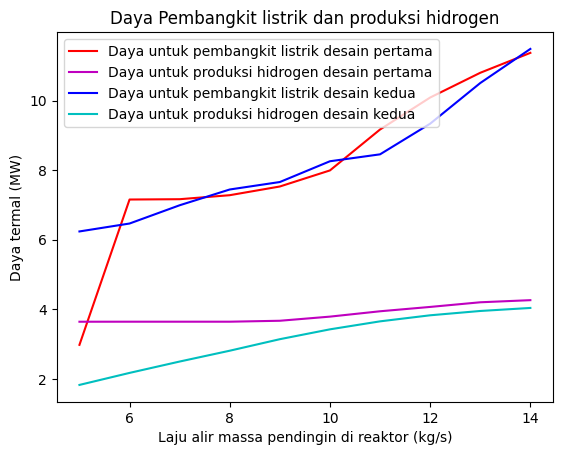

In [ ]:
#jumlah daya turbin

#daya kogenerasi
#daya_kogenerasii = [*set(daya_kogenerasi)]
daya_kogenerasi2.sort(reverse=False)

#daya desalinasi
#daya_heatexchanger2 = [*set(daya_heatexchanger2)]

# Using Numpy to create an array X
X = np.array(data_massfd2)

# Siklus Primer Desain Pertama
y1 = np.array(daya_listrik)
y2 = np.array(daya_kogenerasi)
y3 = np.array(daya_heatexchanger)
  
# Siklus Primer Desain Kedua
y4 = np.array(daya_listrik2)
y5 = np.array(daya_kogenerasi2)
y6 = np.array(daya_heatexchanger2)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r', label='Daya untuk pembangkit listrik desain pertama')
ax.plot(X, y2, 'm', label='Daya untuk produksi hidrogen desain pertama')
ax.plot(X, y4, 'b', label='Daya untuk pembangkit listrik desain kedua')
ax.plot(X, y5, 'c', label='Daya untuk produksi hidrogen desain kedua')
#ax.plot(X, y3, 'b', label='Daya untuk desalinasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Daya termal (MW)")
plt.title("Daya Pembangkit listrik dan produksi hidrogen")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
#EUF Pembangkit Listrik
data_eufturbin2 = []
for i in range (len(daya_listrik2)):
  EUF = (daya_listrik2[i]/40)*100
  data_eufturbin2.append(EUF)
  #data_euf = [*set(data_euf)]

data_eufturbin2.sort(reverse=False)
print(data_eufturbin2)
print(len(data_eufturbin2))

[15.597, 16.166, 17.477249999999998, 18.610249999999997, 19.146500000000003, 20.638249999999996, 21.1355, 23.335999999999995, 26.256249999999998, 28.706]
10


In [ ]:
#EUF Kogenerasi
data_eufkogenerasi2 = []
for i in range (len(daya_kogenerasi2)):
  EUF = (daya_kogenerasi2[i]/40)*100
  data_eufkogenerasi2.append(EUF)
  #data_euf = [*set(data_euf)]

data_eufkogenerasi2.sort(reverse=False)
print(data_eufkogenerasi2)
print(len(data_eufkogenerasi2))

[4.574, 5.437250000000001, 6.253499999999999, 7.03125, 7.858750000000001, 8.56625, 9.14, 9.57475, 9.88525, 10.102500000000001]
10


In [ ]:
#EUF Desalinasi
data_eufdesalinasi2 = []
for i in range (len(daya_heatexchanger2)):
  EUF = (daya_heatexchanger2[i]/40)*100
  data_eufdesalinasi2.append(EUF)
  #data_euf = [*set(data_euf)]

data_eufdesalinasi2.sort(reverse=False)
print(data_eufdesalinasi2)
print(len(data_eufdesalinasi2))

[20.634999999999998, 28.196750000000005, 35.34525, 41.9815, 48.00925, 51.98349999999999, 55.15825000000001, 57.153, 58.3385, 59.0465]
10


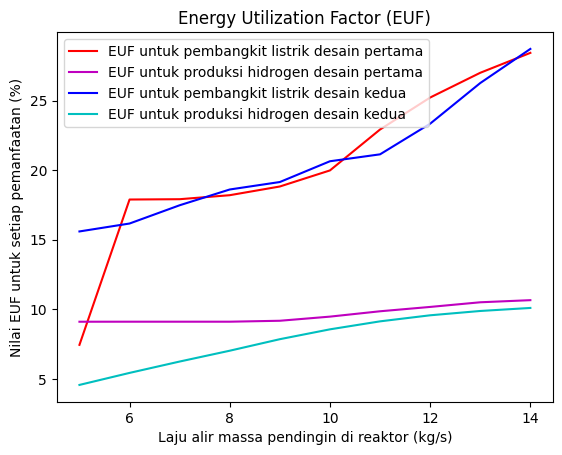

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd2)

# Siklus Primer Desain Pertama
y1 = np.array(data_eufturbin)
y2 = np.array(data_eufkogenerasi)
#y3 = np.array(data_eufdesalinasi)
  
# Siklus Primer Desain kedua
y3 = np.array(data_eufturbin2)
y4 = np.array(data_eufkogenerasi2)
#y3 = np.array(data_eufdesalinasi2)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y1, 'r', label='EUF untuk pembangkit listrik desain pertama')
ax.plot(X, y2, 'm', label='EUF untuk produksi hidrogen desain pertama')
ax.plot(X, y3, 'b', label='EUF untuk pembangkit listrik desain kedua')
ax.plot(X, y4, 'c', label='EUF untuk produksi hidrogen desain kedua')
#ax.plot(X, y3, 'b', label='EUF untuk desalinasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Nilai EUF untuk setiap pemanfaatan (%)")
plt.title("Energy Utilization Factor (EUF)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
#EUF Total
data_euf2 = []
for i in range (len(daya_kogenerasi2)):
  EUF = daya_kogenerasi2[i]+daya_listrik2[i]
  EUF = (EUF/40)*100
  data_euf2.append(EUF)
  #data_euf = [*set(data_euf)]

data_euf2.sort(reverse=False)
print(data_euf2)
print(len(data_euf2))

[20.171, 21.603250000000003, 23.73075, 25.641499999999994, 27.005250000000004, 29.2045, 30.2755, 32.91075, 36.1415, 38.808499999999995]
10


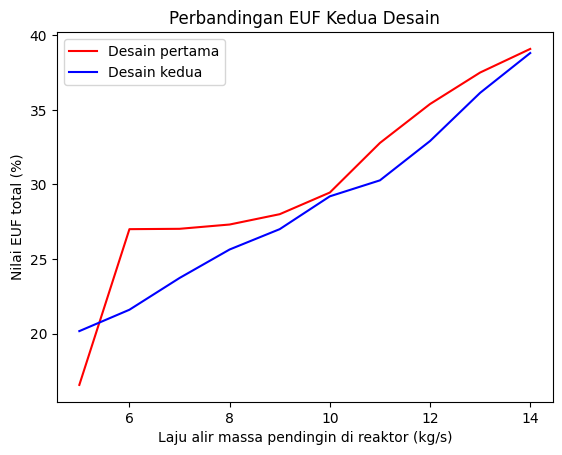

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd)
X2 = np.array(data_massfd2)
  
# Siklus Primer
y1 = np.array(data_euf)
y2 = np.array(data_euf2)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
plt.title("Perbandingan EUF Kedua Desain")
ax.plot(X, y1, 'r', label='Desain pertama')
ax.plot(X2, y2, 'b', label='Desain kedua')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Nilai EUF total (%)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
data_efisiensi2 = []

for i in range (len(daya_listrik2)):
  #efisiensi1 = (daya_heatexchanger[i]+daya_blower[i]+daya_sistem[i]+daya_sirkulators[i]-daya_turbin[i])
  #print(efisiensi1)
  efisiensi = (daya_listrik2[i]+daya_steamgenerator2[i]-daya_heatexchanger2[i])/(40-daya_kogenerasi2[i])*100
  data_efisiensi2.append(efisiensi)
  #print(data_efisiensi)
  data_efisiensi2 = [*set(data_efisiensi2)]
  
data_efisiensi2.sort(reverse=False)
print(data_efisiensi2)
print(len(data_efisiensi2))
print(data_efisiensi)

[10.41464448302733, 25.77756988773937, 43.956195863434154, 46.35555299394294, 56.26422666430491, 61.573993158722615, 67.43558426181244, 73.07516894240662, 74.38332773109244, 75.54515485735216]
10
[28.70919738467167, 47.19715245323085, 49.50115667833889, 50.14317504765623, 51.63913442030881, 54.69587167618566, 61.88825250662193, 67.57696279122844, 72.18950614869736, 75.70287249373871]


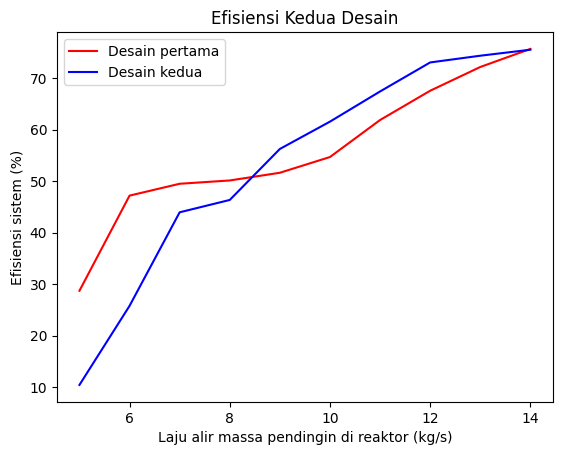

In [ ]:
# Using Numpy to create an array X
X = np.array(data_massfd)
  
# Data efisiensi
y1 = np.array(data_efisiensi)
y2 = np.array(data_efisiensi2)
  
# Plotting both the curves simultaneously
fig, ax = plt.subplots()
plt.title("Efisiensi Kedua Desain")
ax.plot(X, y1, 'r', label = 'Desain pertama')
ax.plot(X, y2, 'b', label = 'Desain kedua')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju alir massa pendingin di reaktor (kg/s)")
plt.ylabel("Efisiensi sistem (%)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
tabel = ['Laju Alir Massa Pendingin di Reaktor', 'Daya Turbin Desain 1', 'Daya Turbin Desain 2', 'Daya Kogenerasi Desain 1', 'Daya Kogenerasi Desain 2']
isi = list(zip(data_massfd, daya_listrik, daya_listrik2, daya_kogenerasi, daya_kogenerasi2))
dftabel = pd.DataFrame(isi, columns=['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'Daya Listrik Desain 1 (MW)', 'Daya Listrik Desain 2(MW)', 'Daya Produksi Hidrogen Desain 1(MW)', 'Daya Produksi Hidrogen Desain 2(MW)'])
dftabel

,Laju Alir Massa Pendingin di Reaktor (Kg/s),Daya Listrik Desain 1 (MW),Daya Listrik Desain 2(MW),Daya Produksi Hidrogen Desain 1(MW),Daya Produksi Hidrogen Desain 2(MW)
0,5,2.9807,6.2388,3.6451,1.8296
1,6,7.1558,6.4664,3.6459,2.1749
2,7,7.1650,6.9909,3.6459,2.5014
3,8,7.2802,7.4441,3.6459,2.8125
4,9,7.5302,7.6586,3.6729,3.1435
5,10,7.9920,8.2553,3.7916,3.4265
6,11,9.1676,8.4542,3.9455,3.6560
7,12,10.0861,9.3344,4.0703,3.8299
8,13,10.7970,10.5025,4.2038,3.9541
9,14,11.3692,11.4824,4.2645,4.0410


In [ ]:
from google.colab import files
dftabel.to_csv('Data .csv', encoding = 'utf-8-sig') 
files.download('Data .csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>